In [78]:
from langgraph.graph import StateGraph, START, END
import random
from typing import Dict, List, TypedDict

In [79]:
from unittest import result


class AgentState(TypedDict):
    player: str
    target: int
    guesses: List[int]
    current_guess: int
    attempts: int
    lower: int
    higher: int
    result: str

In [80]:
def setup(state: AgentState) -> AgentState:
    """Starting of the Automatic higher lower game"""
    
    print(f"Hello! {state['player']}, Welcome to the game")
    state['target'] = random.randint(state['lower'], state['higher'])
    print(f"Target : {state['target']}")
    state['attempts'] = 0
    state['result'] = "no"
    
    return state

def guess(state: AgentState) -> AgentState:
    """Guess the number"""
    
    state['current_guess'] = random.randint(state['lower'], state['higher'])
    print(f"Guessed : {state['current_guess']}")
    state['attempts'] += 1
    state['guesses'].append(state['current_guess'])
    
    return state

def hint(state: AgentState) -> AgentState:
    """Give a hint based on the guess"""

    if state['current_guess'] < state['target']:
        state['lower'] = state['current_guess']
        print(f"Higer than {state['current_guess']}")
    elif state['current_guess'] > state['target']:
        state['higher'] = state['current_guess']
        print(f"Lower than {state['current_guess']}")
    else:
        print(f"Correct! You guessed the number in {state['attempts']} attempts")
        state['result'] = "yes"
    
    return state
        
def should_continue(state: AgentState) -> AgentState:
    """Check if the user wants to continue"""
    
    if state['result'] == "no" and state['attempts'] < 7:
        print("Guees Again")
        return "loop"
    elif state['result'] == "yes":
        print(f"You guessed the number in {state['attempts']} attempts")
        return "end"
    else:
        print("You lost the game")
        return "end"

In [81]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("hint", hint)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")

graph.add_conditional_edges(
    "hint",
    should_continue,
    {
        "loop": "guess",
        "end": END
    }
)

app = graph.compile()

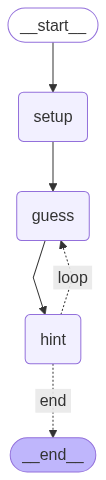

In [82]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [83]:
initial_state = AgentState(
    player = "John",
    traget = 0,
    guesses = [],
    current_guess = 0,
    attempts = 0,
    lower = 0,
    higher = 20,
)

app.invoke(initial_state)

Hello! John, Welcome to the game
Target : 9
Guessed : 18
Lower than 18
Guees Again
Guessed : 5
Higer than 5
Guees Again
Guessed : 15
Lower than 15
Guees Again
Guessed : 13
Lower than 13
Guees Again
Guessed : 5
Higer than 5
Guees Again
Guessed : 11
Lower than 11
Guees Again
Guessed : 9
Correct! You guessed the number in 7 attempts
You guessed the number in 7 attempts


{'player': 'John',
 'target': 9,
 'guesses': [18, 5, 15, 13, 5, 11, 9],
 'current_guess': 9,
 'attempts': 7,
 'lower': 5,
 'higher': 11,
 'result': 'yes'}